In [20]:
class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=400, learning_rate=0.1):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = [0] * (no_of_inputs + 1)  # Initialize weights with zeros
        self.bias = 0

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] = [w + self.learning_rate * error * x for w, x in zip(self.weights[1:], inputs)]
                self.bias += self.learning_rate * error

    def predict(self, inputs):
        summation = sum(w * x for w, x in zip(self.weights[1:], inputs)) + self.bias
        return 1 if summation > 0 else 0

# Dataset - mimic the behavior of a logical OR gate
training_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
labels = [0, 1, 1, 1]

# Training
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

# Prediction
inputs = [1, 1]
print(perceptron.predict(inputs))  # Output: 1

inputs = [0, 0]
print(perceptron.predict(inputs))  # Output: 0


1
0


In [16]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_units, learning_rate):
        self.input_size = input_size
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        
        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_units)
        self.bias_hidden = np.random.rand(1, self.hidden_units)
        self.weights_hidden_output = np.random.rand(self.hidden_units, 1)
        self.bias_output = np.random.rand(1, 1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, inputs):
        # Hidden layer calculation
        hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_activation = self.sigmoid(hidden_sum)
        
        # Output layer calculation
        output_sum = np.dot(hidden_activation, self.weights_hidden_output) + self.bias_output
        output = self.sigmoid(output_sum)
        
        return hidden_activation, output
    
    def backward_propagation(self, inputs, hidden_activation, output, target):
        # Calculate error
        output_error = target - output
        output_delta = output_error * self.sigmoid_derivative(output)
        
        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_activation)
        
        # Update weights and biases
        self.weights_hidden_output += hidden_activation.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta) * self.learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta) * self.learning_rate
    
    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            for input_data, target in zip(inputs, targets):
                input_data = input_data.reshape(1, self.input_size)  # Reshape input data
                hidden_activation, output = self.forward_propagation(input_data)
                self.backward_propagation(input_data, hidden_activation, output, target)


hidden_units = 2
learning_rate = 0.1
epochs = 10000


inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])


nn = NeuralNetwork(input_size=2, hidden_units=hidden_units, learning_rate=learning_rate)
nn.train(inputs, targets, epochs)

# Test the trained network
for input_data in inputs:
    input_data = input_data.reshape(1, 2)  # Reshape input data
    _, output = nn.forward_propagation(input_data)
    print(f"Input: {input_data}, Output: {output}")


Input: [[0 0]], Output: [[0.08897496]]
Input: [[0 1]], Output: [[0.87239171]]
Input: [[1 0]], Output: [[0.87470902]]
Input: [[1 1]], Output: [[0.15809485]]


In [19]:
class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=400, learning_rate=0.3):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = [0] * (no_of_inputs + 1)  # Initialize weights with zeros
        self.bias = 0

    def train(self, training_inputs, labels, epochs):
        for epoch in range(1, epochs + 1):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] = [w + self.learning_rate * error * x for w, x in zip(self.weights[1:], inputs)]
                self.bias += self.learning_rate * error
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Weights = {self.weights}, Bias = {self.bias}")

    def predict(self, inputs):
        summation = sum(w * x for w, x in zip(self.weights[1:], inputs)) + self.bias
        return 1 if summation > 0 else 0

# Dataset - mimic the behavior of a logical OR gate
training_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
labels = [0, 1, 1, 1]

# Training and analysis
epochs_list = [200, 400,]  # Different number of epochs for analysis
for epochs in epochs_list:
    print(f"\nTraining with {epochs} epochs:")
    perceptron = Perceptron(2)
    perceptron.train(training_inputs, labels, epochs)

# Prediction
inputs = [1, 1]
print("\nPrediction for [1, 1]:", perceptron.predict(inputs))  # Output: 1

inputs = [0, 0]
print("Prediction for [0, 0]:", perceptron.predict(inputs))  # Output: 0



Training with 200 epochs:
Epoch 100: Weights = [0, 0.3, 0.3], Bias = 0.0
Epoch 200: Weights = [0, 0.3, 0.3], Bias = 0.0

Training with 400 epochs:
Epoch 100: Weights = [0, 0.3, 0.3], Bias = 0.0
Epoch 200: Weights = [0, 0.3, 0.3], Bias = 0.0
Epoch 300: Weights = [0, 0.3, 0.3], Bias = 0.0
Epoch 400: Weights = [0, 0.3, 0.3], Bias = 0.0

Prediction for [1, 1]: 1
Prediction for [0, 0]: 0


Iteration 1, loss = 2.30239083
Iteration 2, loss = 1.88545071
Iteration 3, loss = 1.55511959
Iteration 4, loss = 1.29203297
Iteration 5, loss = 1.08516917
Iteration 6, loss = 0.92390326
Iteration 7, loss = 0.79562556
Iteration 8, loss = 0.69338333
Iteration 9, loss = 0.60944967
Iteration 10, loss = 0.54042891
Iteration 11, loss = 0.48401071
Iteration 12, loss = 0.43516666
Iteration 13, loss = 0.39433777
Iteration 14, loss = 0.35908349
Iteration 15, loss = 0.32828359
Iteration 16, loss = 0.30251740
Iteration 17, loss = 0.27951641
Iteration 18, loss = 0.25962651
Iteration 19, loss = 0.24175371
Iteration 20, loss = 0.22624011
Iteration 21, loss = 0.21220673
Iteration 22, loss = 0.19964886
Iteration 23, loss = 0.18836293
Iteration 24, loss = 0.17841597
Iteration 25, loss = 0.16902752
Iteration 26, loss = 0.16060914
Iteration 27, loss = 0.15293807
Iteration 28, loss = 0.14580661
Iteration 29, loss = 0.13893861
Iteration 30, loss = 0.13271793
Iteration 31, loss = 0.12698607
Iteration 32, los

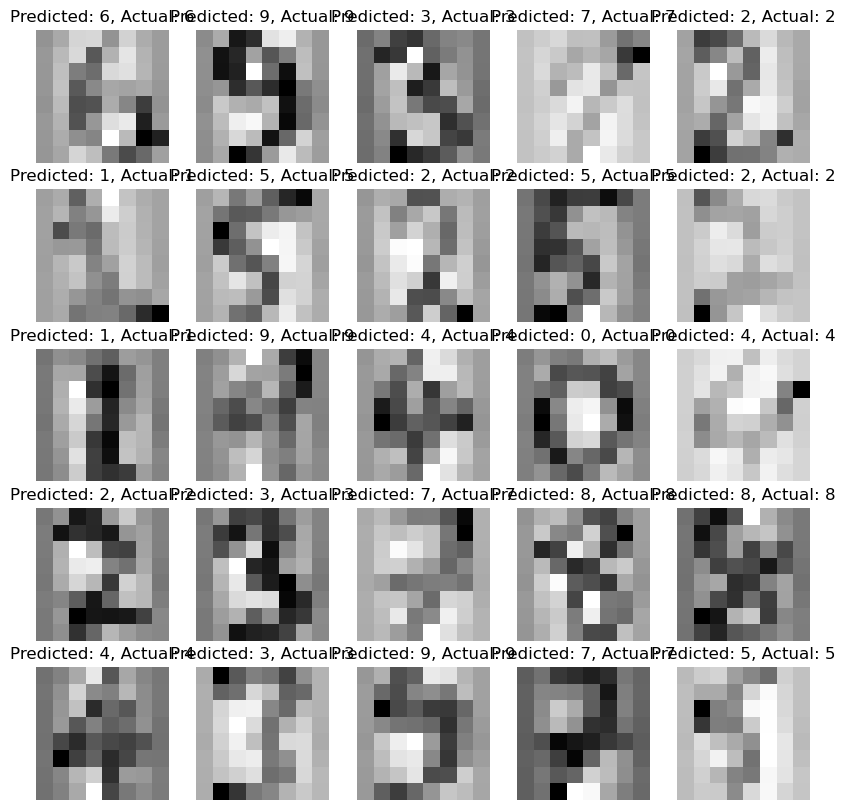

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the MNIST dataset
mnist = load_digits()

# Split the dataset into features (X) and labels (y)
X = mnist.data
y = mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling them to have mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, random_state=42,
                    learning_rate_init=0.001)
mlp.fit(X_train, y_train)

# Predictions
predictions = mlp.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Display some example predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()


In [24]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


C:\Users\lab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8612 - loss: 0.4754 - val_accuracy: 0.9554 - val_loss: 0.1565
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9580 - loss: 0.1433 - val_accuracy: 0.9653 - val_loss: 0.1204
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9738 - loss: 0.0900 - val_accuracy: 0.9703 - val_loss: 0.1024
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9743 - val_loss: 0.0892
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0480 - val_accuracy: 0.9731 - val_loss: 0.0930
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0361 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0305 - val_accuracy: 0.9745 - val_loss: 0.0866
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accurac

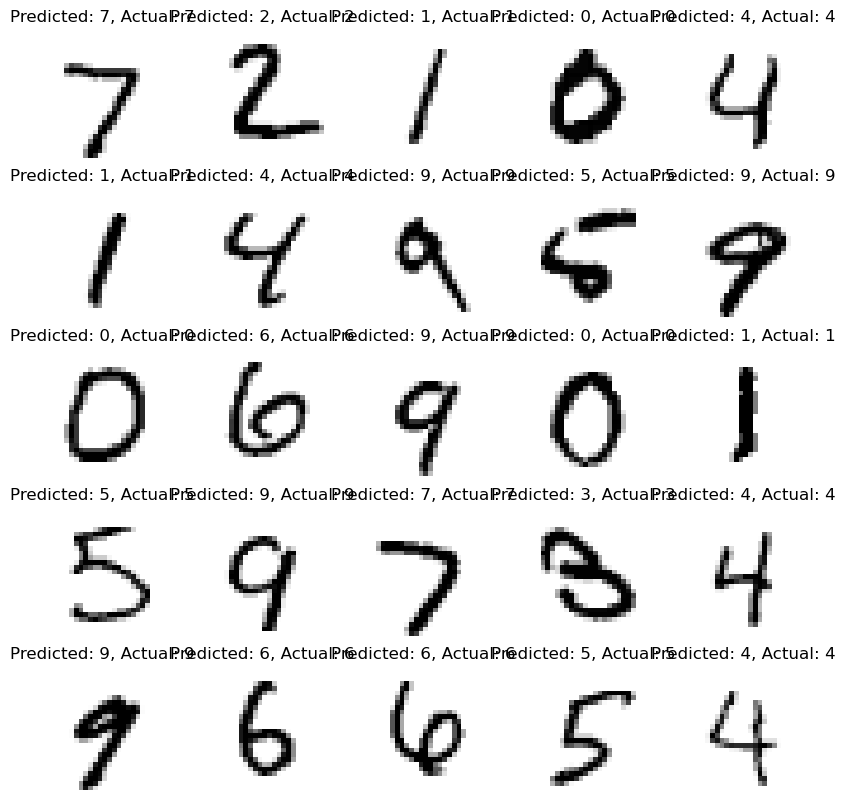

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and scale the input data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predictions
predictions = np.argmax(model.predict(X_test), axis=-1)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Display some example predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()
